In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
dataJson = pd.read_json('gdrive/MyDrive/dataset(HateXplain).json')


In [ ]:
dataCsv = pd.read_csv('gdrive/MyDrive/HateXplain.csv')

In [ ]:
dataXcel = pd.read_excel('gdrive/MyDrive/HateXplain.xlsx')

In [ ]:
# dataJson.to_csv("hateXplainCsv.csv",index=False)

In [ ]:
# dataCsv = pd.read_csv('hateXplainCsv.csv')

In [ ]:
dataXcel.head()

,Post_Tokens,Type,African,Arabs,Asians,Caucasian,Hispanic,Buddhism,Christian,Hindu,Islam,Jewish,Men,Women,Heterosexual,LGBTQ,Indigenous,Refugee/Immigrant,None,Others


In [ ]:
dataJson['1179055004553900032_twitter'][1]

[{'annotator_id': 1, 'label': 'normal', 'target': ['None']},
 {'annotator_id': 2, 'label': 'normal', 'target': ['None']},
 {'annotator_id': 3, 'label': 'normal', 'target': ['None']}]

In [ ]:
dataJson['1179055004553900032_twitter'][1][0]

{'annotator_id': 1, 'label': 'normal', 'target': ['None']}

In [ ]:
dataJson['1179055004553900032_twitter'][3]

['i',
 'dont',
 'think',
 'im',
 'getting',
 'my',
 'baby',
 'them',
 'white',
 '9',
 'he',
 'has',
 'two',
 'white',
 'j',
 'and',
 'nikes',
 'not',
 'even',
 'touched']

In [ ]:
# dictList = []
idList = []
tokenList = []
labelList = []
targetList = []
for key1 in dataJson:
  tokenList.append(dataJson[key1][3])

# cnt = 0
for key1 in dataJson:
  # if cnt == 1000:
  #   break
  dictTemp = {'normal': 0, 'hatespeech': 0, 'offensive': 0}
  dictTemp[dataJson[key1][1][0]['label']] += 1
  dictTemp[dataJson[key1][1][1]['label']] += 1
  dictTemp[dataJson[key1][1][2]['label']] += 1
  max_label = max(dictTemp, key=dictTemp.get)
  if dictTemp[max_label] == 1:
    max_label = "normal"
    # These are the ambigious labels, so they will be labeled as normal
    # print(dataJson[key1][0]) 
  labelList.append(max_label)


cnt = 0
for key1 in dataJson:

  # if cnt == 5:
  #   break
  tempTargetDict = {}
  for i in range(3):
    tempTargetList = dataJson[key1][1][i]['target']
    # print(tempTargetList)
    for target in tempTargetList:
      if target in tempTargetDict:
        tempTargetDict[target] += 1
      else:
        tempTargetDict[target] = 1

  tempValidTargetList = []
  # print(tempTargetDict)
  for key in tempTargetDict:
    if tempTargetDict[key] >= 1:
      # print(key)
      tempValidTargetList.append(key)

  # print(tempValidTargetList)
  targetList.append(tempValidTargetList)
  # print()
  # cnt += 1

for key1 in dataJson:
  id = dataJson[key1][0]
  idList.append(id)





In [ ]:
# dictList = []
idList = []
tokenList = []
labelList = []
targetList = []
for key1 in dataJson:
  tokenList.append(dataJson[key1][3])

# cnt = 0
for key1 in dataJson:
  # if cnt == 1000:
  #   break
  dictTemp = {'normal': 0, 'hatespeech': 0, 'offensive': 0}
  dictTemp[dataJson[key1][1][0]['label']] += 1
  dictTemp[dataJson[key1][1][1]['label']] += 1
  dictTemp[dataJson[key1][1][2]['label']] += 1
  max_label = max(dictTemp, key=dictTemp.get)
  if dictTemp[max_label] == 1:
    max_label = "normal"
    # These are the ambigious labels, so they will be labeled as normal
    # print(dataJson[key1][0]) 
  labelList.append(max_label)


cntmax = 0
for key1 in dataJson:

  # if cnt == 5:
  #   break
  tempTargetDict = {}
  for i in range(3):
    tempTargetList = dataJson[key1][1][i]['target']
    # print(tempTargetList)
    for target in tempTargetList:
      if target in tempTargetDict:
        tempTargetDict[target] += 1
      else:
        tempTargetDict[target] = 1

  tempValidTargetList = []
  cnt = 0
  # print(tempTargetDict)
  for key in tempTargetDict:
    if tempTargetDict[key] >= 2:
      cnt = 1
      # print(key)
      tempValidTargetList.append(key)

  # print(tempValidTargetList)
  targetList.append(tempValidTargetList)
  # print()
  # cnt += 1
  cntmax += cnt

for key1 in dataJson:
  id = dataJson[key1][0]
  idList.append(id)

print(20148 - cntmax)

1095


In [ ]:
targetNames = ['African',	'Arab',	'Asian',	'Caucasian',	'Hispanic',	'Buddhism',	'Christian',	'Hindu',	'Islam',	'Jewish',	'Men', 'Women',	'Heterosexual',	'Indigenous',	'Refugee',	'None',	'Other', 'Homosexual']


In [ ]:
# megaList[listAfrican = [],
# listArabs = [],
# listAsians = [],
# listCaucasian = [],
# listHispanic = [],
# listBuddhism = [],
# listChristian = [],
# listHindu = [],
# listIslam = [],
# listJewish = [],
# listMen = [],
# listWomen = [],
# listHeterosexual = [],
# listIndigenous = [],
# listRefugeeImmigrant = [],
# listNone = [],
# listOthers = []],



In [ ]:
megaList = [[] for i in range(18)]

for key1 in dataJson:

  # if cnt == 5:
  #   break
  tempTargetDict = {'African': 0,	'Arab': 0,	'Asian': 0,	'Caucasian': 0,	'Hispanic': 0,	'Buddhism': 0,	'Christian': 0,	'Hindu': 0,	'Islam': 0,	'Jewish': 0,	'Men': 0, 'Women': 0,	'Heterosexual': 0, 'Indigenous': 0,	'Refugee': 0,	'None': 0,	'Other': 0, 'Homosexual': 0}
  for i in range(3):
    tempTargetList = dataJson[key1][1][i]['target']
    # print(tempTargetList)
    for target in tempTargetList:
      if target in tempTargetDict:
        tempTargetDict[target] += 1
      # else:
      #   tempTargetDict[target] = 1

  tempValidTargetList = []
  # print(tempTargetDict)
  for i in range(len(megaList)):
    name = targetNames[i]
    val = tempTargetDict[name]
    if val > 0:
      megaList[i].append(1)
    else:
      megaList[i].append(0)


In [ ]:
print(len(megaList))

18


In [ ]:
for i in range(len(megaList)):
  print(i, " --> ", targetNames[i], " ---> ", megaList[i])

0  -->  African  --->  [0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0

In [ ]:
cnt = 0
for x in megaList[7]:
  if x == 1:
    cnt += 1
print(cnt)

63


In [ ]:
data = {'id': idList, 'tokens': tokenList, 'label': labelList, 'targetList': targetList}
tokenDf = pd.DataFrame(data = data)
tokenDf

,id,tokens,label,targetList
0,1179055004553900032_twitter,"[i, dont, think, im, getting, my, baby, them, ...",normal,[None]
1,1179063826874032128_twitter,"[we, cannot, continue, calling, ourselves, fem...",normal,[None]
2,1178793830532956161_twitter,"[nawt, yall, niggers, ignoring, me]",normal,[African]
3,1179088797964763136_twitter,"[<user>, i, am, bit, confused, coz, chinese, p...",hatespeech,[Asian]
4,1179085312976445440_twitter,"[this, bitch, in, whataburger, eating, a, burg...",hatespeech,"[Caucasian, Women]"
...,...,...,...,...
20143,9989999_gab,"[if, ur, still, on, twitter, tell, carlton, i,...",offensive,[None]
20144,9990225_gab,"[when, i, first, got, on, here, and, said, i, ...",offensive,[African]
20145,9991681_gab,"[was, macht, der, moslem, wenn, der, zion, geg...",normal,[]
20146,9992513_gab,"[it, is, awful, look, at, world, demographics,...",hatespeech,[Asian]


In [ ]:
data2 = {'id': idList, 'tokens': tokenList, 'label': labelList, 'African': megaList[0], 'Arab': megaList[1], 'Asian': megaList[2],
         'Caucasian': megaList[3], 'Hispanic': megaList[4], 'Buddhism': megaList[5], 'Christian': megaList[6], 'Hindu': megaList[7],
         'Islam': megaList[8], 'Jewish': megaList[9], 'Men': megaList[10], 'Women': megaList[11], 'Heterosexual': megaList[12],
         'Indigenous': megaList[13], 'Refugee': megaList[14], 'None': megaList[15], 'Other': megaList[16], 'Homosexual': megaList[17]}

finalDataFrame = pd.DataFrame(data = data2)
finalDataFrame

,id,tokens,label,African,Arab,Asian,Caucasian,Hispanic,Buddhism,Christian,Hindu,Islam,Jewish,Men,Women,Heterosexual,Indigenous,Refugee,None,Other,Homosexual
0,1179055004553900032_twitter,"[i, dont, think, im, getting, my, baby, them, ...",normal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1179063826874032128_twitter,"[we, cannot, continue, calling, ourselves, fem...",normal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1178793830532956161_twitter,"[nawt, yall, niggers, ignoring, me]",normal,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1179088797964763136_twitter,"[<user>, i, am, bit, confused, coz, chinese, p...",hatespeech,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1179085312976445440_twitter,"[this, bitch, in, whataburger, eating, a, burg...",hatespeech,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20143,9989999_gab,"[if, ur, still, on, twitter, tell, carlton, i,...",offensive,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0
20144,9990225_gab,"[when, i, first, got, on, here, and, said, i, ...",offensive,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
20145,9991681_gab,"[was, macht, der, moslem, wenn, der, zion, geg...",normal,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
20146,9992513_gab,"[it, is, awful, look, at, world, demographics,...",hatespeech,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
tokenDf.to_csv('dataset.csv')
finalDataFrame.to_csv('finalizedDataset.csv')


In [ ]:
len(idList)
    



20148


#**Creating Graphs**

In [ ]:
import matplotlib.pyplot as plt

dataset = finalDataFrame
normal = 0
offensive = 0
hatespeech = 0
for i in range(len(dataset)):
  if dataset['label'][i] == "normal":
    normal += 1
  elif dataset['label'][i] == "hatespeech":
    hatespeech += 1
  else:
    offensive += 1



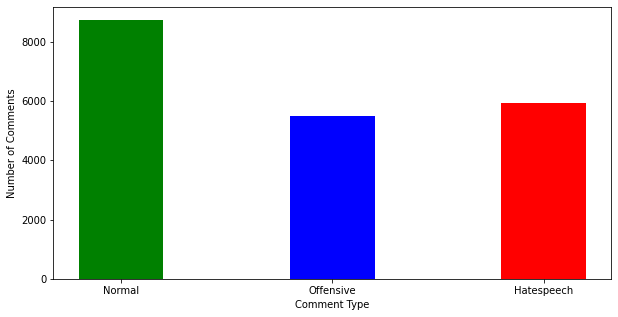

In [ ]:
# Comment labels plotted against number of comments.

labels = ["Normal", "Offensive", "Hatespeech"]
values = [normal, offensive, hatespeech]

fig = plt.figure(figsize = (10, 5))

plt.bar(labels, values, color = ["green", "blue", "red"], width = 0.4)
plt.xlabel("Comment Type")
plt.ylabel("Number of Comments")


plt.show()

In [ ]:
targetFrequency = [0] * 18


for i in range(len(targetNames)):
  for j in range(len(dataset)):
    if dataset[targetNames[i]][j] == 1:
      targetFrequency[i] += 1


print(targetFrequency)




[4468, 1784, 727, 1698, 712, 10, 208, 63, 3201, 2543, 1659, 3926, 141, 81, 1701, 10772, 3702, 2596]


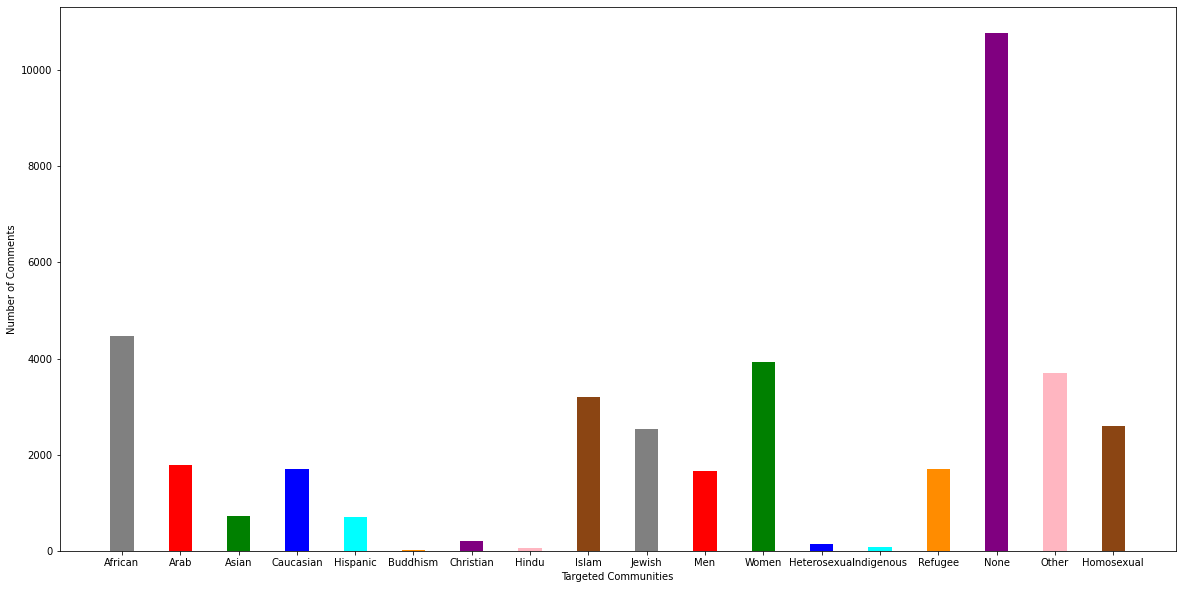

In [ ]:
# Targeted communities plotted against the number of comments which target them.


labels = targetNames
values = targetFrequency

fig = plt.figure(figsize = (20, 10))

plt.bar(labels, values, color = ['gray', 'red', 'green', 'blue', 'cyan', 'darkorange', 'purple', 'lightpink', 'saddlebrown'], width = 0.4)
plt.xlabel("Targeted Communities")
plt.ylabel("Number of Comments")
plt.show()

In [ ]:
# Number of Targetted communities plotted against number of comments. Will tell us
# the number of targeted communities for each comment.

countTarget = [0] * 19

for i in range(len(dataset)):
  count = 0
  for target in targetNames:
    if dataset[target][i] == 1:
      count += 1
  countTarget[count] += 1
  # if count == 0:
  #   print(dataset['id'][i])



# print(sum)

values = []
for i in range(1, 14):
  values.append(countTarget[i])

print(values)


[7977, 7188, 3236, 1122, 380, 161, 46, 16, 9, 1, 1, 1, 1]


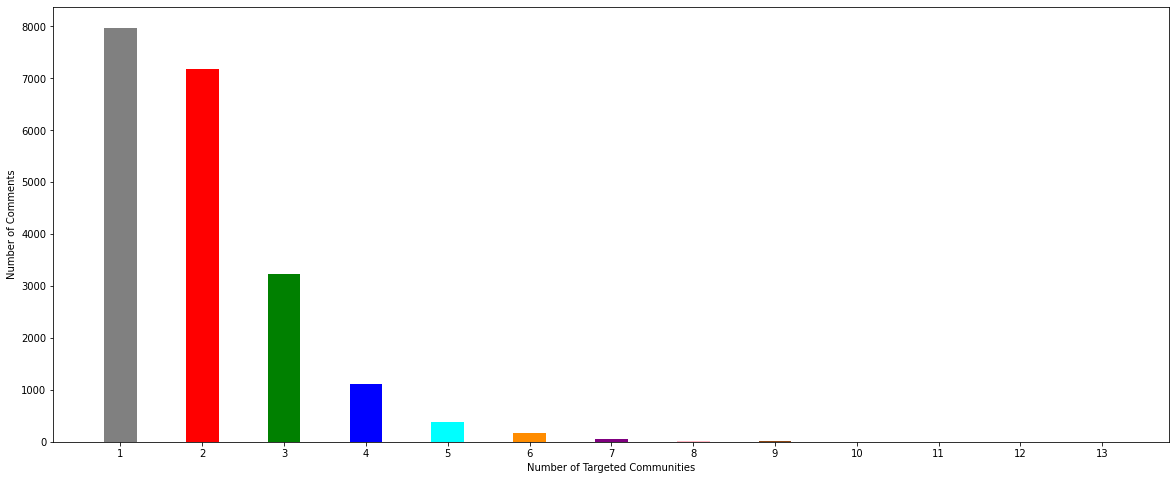

In [ ]:
import numpy as np
labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13"]
# print(labels)

fig = plt.figure(figsize = (20, 8))

plt.bar(labels, values, color = ['gray', 'red', 'green', 'blue', 'cyan', 'darkorange', 'purple', 'lightpink', 'saddlebrown'], width = 0.4)
plt.xlabel("Number of Targeted Communities")
plt.ylabel("Number of Comments")
plt.show()